In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
oecd_bli = pd.read_csv("oecd_bli_2023.csv", thousands = ',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv", na_values = 'n/a')

In [86]:
def prepare_country_stats(df1, df2):
    df1 = df1[(df1["Indicator"] == "Life satisfaction") & (df1["Inequality"] == "Total")]
    new_df = df1.merge(df2, how="inner", on="Country")
    new_df = new_df[["Country", "2022", "Value"]]
    new_df = new_df.rename(columns = {"2022": 'GDP per capita', "Value": "Life Satisfaction"})
    new_df = new_df.replace(",", "", regex=True)
    new_df['GDP per capita'] = new_df['GDP per capita'].apply(pd.to_numeric)
    return new_df

In [96]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
country_stats = country_stats[country_stats["GDP per capita"] < 80000]
country_stats

,Country,GDP per capita,Life Satisfaction
1,Austria,42422.82,7.2
2,Belgium,39902.57,6.8
3,Canada,56006.44,7.0
5,Finland,42357.57,7.9
6,France,35801.91,6.7
7,Germany,39080.41,7.3
8,Greece,18362.46,5.8
12,Italy,29581.40,6.5
17,Netherlands,45843.05,7.5
18,New Zealand,54246.10,7.3


In [132]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life Satisfaction"]]

(2, 1)

<Figure size 1200x600 with 0 Axes>

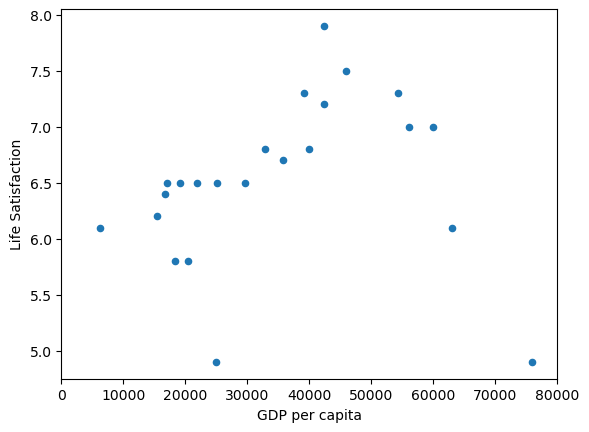

In [98]:
plt.figure(figsize=(12, 6))
country_stats.plot(kind="scatter", x = "GDP per capita", y = 'Life Satisfaction')
plt.xlim([0, 80000])
plt.show()

In [107]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X, y)

LinearRegression()

In [133]:
y_pred = lin_reg_model.predict(X)

<Figure size 1200x600 with 0 Axes>

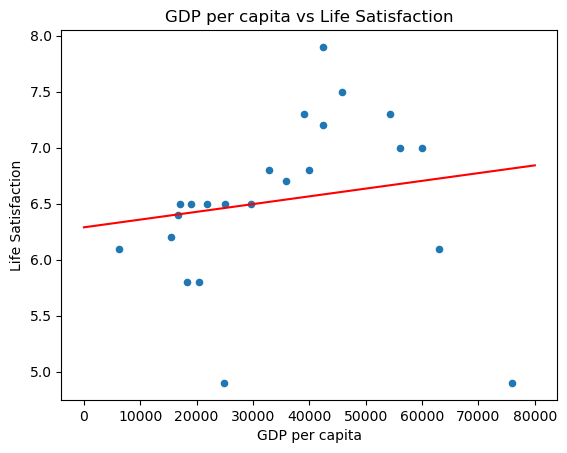

In [134]:
X_test = [[0], [80000]]
y_line = lin_reg_model.predict(X_test)
plt.figure(figsize=(12, 6))
country_stats.plot(kind="scatter", x = "GDP per capita", y = 'Life Satisfaction')
plt.plot(X_test, y_line, color="red")
plt.title("GDP per capita vs Life Satisfaction")
plt.show()

In [141]:
X_new = [[34304.432]] # Andora GDP
y_new = lin_reg_model.predict(X_new)

<Figure size 1200x600 with 0 Axes>

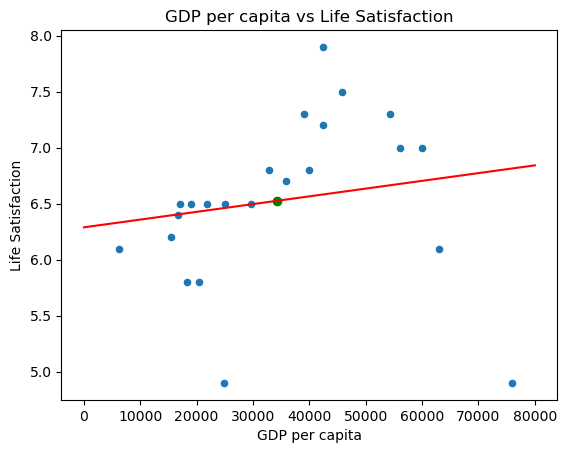

In [142]:
plt.figure(figsize=(12, 6))
country_stats.plot(kind="scatter", x = "GDP per capita", y = 'Life Satisfaction')
plt.plot(X_test, y_line, color="red")
plt.scatter(X_new, y_new, color="green")
plt.title("GDP per capita vs Life Satisfaction")
plt.show()

In [143]:
print("b1: %.2f" % lin_reg_model.predict([[0]])[0][0])
print("b2: ", lin_reg_model.coef_[0][0])
print("Mean Squared Error: %.2f" % mean_squared_error(y, y_pred))
print("Coefficient of Determination: %.2f" % r2_score(y, y_pred))

b1: 6.29
b2:  6.91615535504178e-06
Mean Squared Error: 0.50
Coefficient of Determination: 0.03
